In [330]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [331]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [332]:
# Configure the custom library path
import os
import sys

module_path = os.path.abspath(os.path.join('../'))
sys.path.insert(0, module_path)

In [333]:
# Lectura de datos
data = pd.read_csv('C:\\Users\\andre\\OneDrive\\Documentos\\Documentos Andres\\Univalle\\5 SEMESTRE\\Física 4\\Laboratorios\\LEY_DE_ENFRIAMIENTO.csv', delimiter='\t')

data_manual = pd.read_csv('C:\\Users\\andre\\OneDrive\\Documentos\\Documentos Andres\\Univalle\\5 SEMESTRE\\Física 4\\Laboratorios\\datos_manuales.csv', delimiter=',')


In [334]:
# Estandarizacion de datos
tiempo_sa = data["Tiempo"].values 
temperatura_sa = data["Temperatura"].values

tiempo_manual = data_manual["Tiempo"].values 
temperatura_manual = data_manual["Temperatura"].values
print(temperatura_manual)
print(tiempo_manual)

Ta_sa = temperatura_sa[0] # temperatura ambiente
T0_sa = np.max(temperatura_sa)
t0_sa = tiempo_sa[np.argmax(temperatura_sa)]

for i in range(len(temperatura_sa)):
    if temperatura_sa[i] == T0_sa:
        temperatura_sa = temperatura_sa[i : ]
        tiempo_sa = tiempo_sa[i : ]
        break

temperatura_sa = temperatura_sa - Ta_sa
tiempo_sa = tiempo_sa - t0_sa

T0_sa = np.max(temperatura_sa)
t0_sa = tiempo_sa[np.argmax(temperatura_sa)]

Ta_manual = 23
T0_manual = temperatura_manual[0]

[58. 56. 54. 52. 51. 49. 47. 45. 44. 42. 41. 40. 38. 36. 34. 32. 30. 28.
 27. 25. 24. 23. 22. 21. 20. 19. 18.]
[   0.  120.  240.  360.  480.  600.  720.  840.  960. 1080. 1200. 1320.
 1440. 1680. 1920. 2160. 2400. 2640. 2880. 3120. 3360. 3600. 3840. 4080.
 4320. 4560. 4800.]


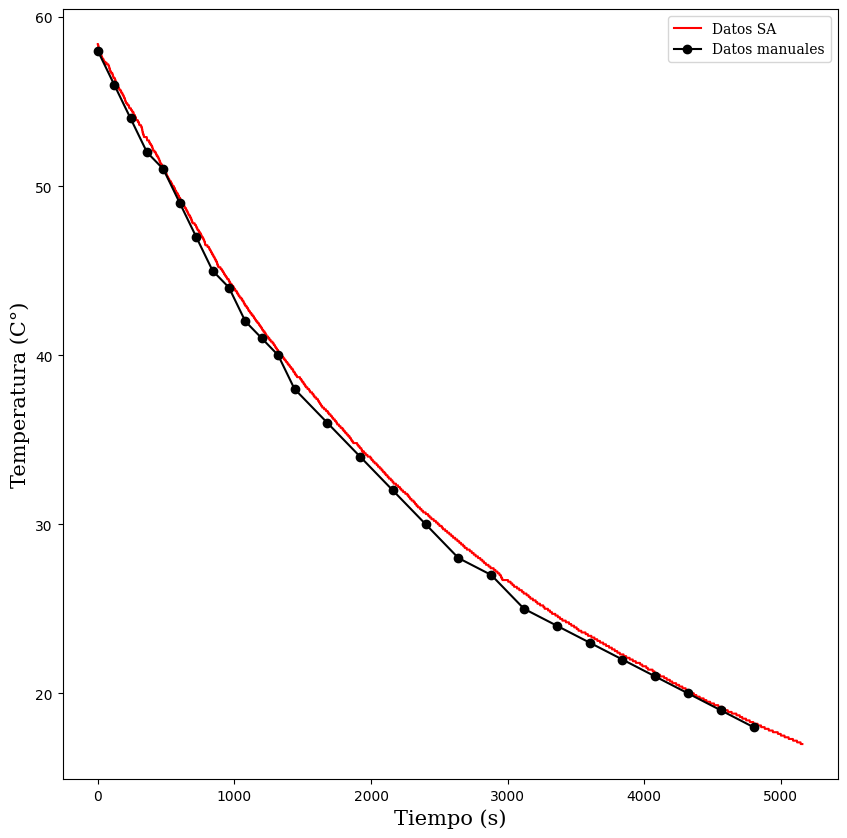

In [335]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}
font3 = {'family':'serif','color':'black','size':10}

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(tiempo_sa, temperatura_sa, color = 'red', label='Datos SA')
plt.plot(tiempo_manual, temperatura_manual , '-o', color = 'black', label='Datos manuales')
plt.xlabel("Tiempo (s)", fontdict = font2)
plt.ylabel("Temperatura (C°)", fontdict = font2)

legend = plt.legend(loc='upper right')
for text in legend.texts:
    text.set_fontsize(font3['size'])
    text.set_family(font3['family'])

plt.show()

In [336]:
#Regresión lineal de dattos SA

temp_sa_linealizada = np.log( temperatura_sa / (T0_sa - Ta_sa) )

regress = stats.linregress(tiempo_sa, temp_sa_linealizada)

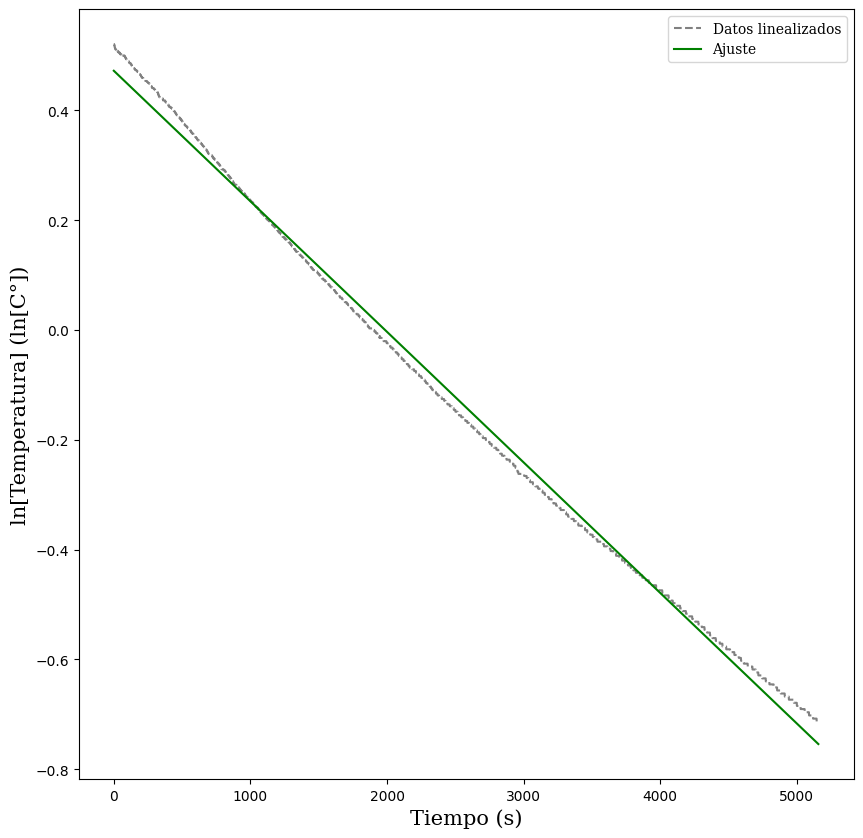

In [337]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(tiempo_sa, temp_sa_linealizada , '--', color = 'gray',  label='Datos linealizados')
plt.plot(tiempo_sa, regress.slope * tiempo_sa + regress.intercept,  'g',  label='Ajuste')
plt.xlabel("Tiempo (s)", fontdict = font2)
plt.ylabel("ln[Temperatura] (ln[C°])", fontdict = font2)

legend = plt.legend(loc='upper right')
for text in legend.texts:
    text.set_fontsize(font3['size'])
    text.set_family(font3['family'])

plt.show()

In [338]:
#Regresión lineal de dattos manuales

temp_manual_linealizada = np.log( temperatura_manual / (T0_manual - Ta_manual) )

regress_manual = stats.linregress(tiempo_manual, temp_manual_linealizada)

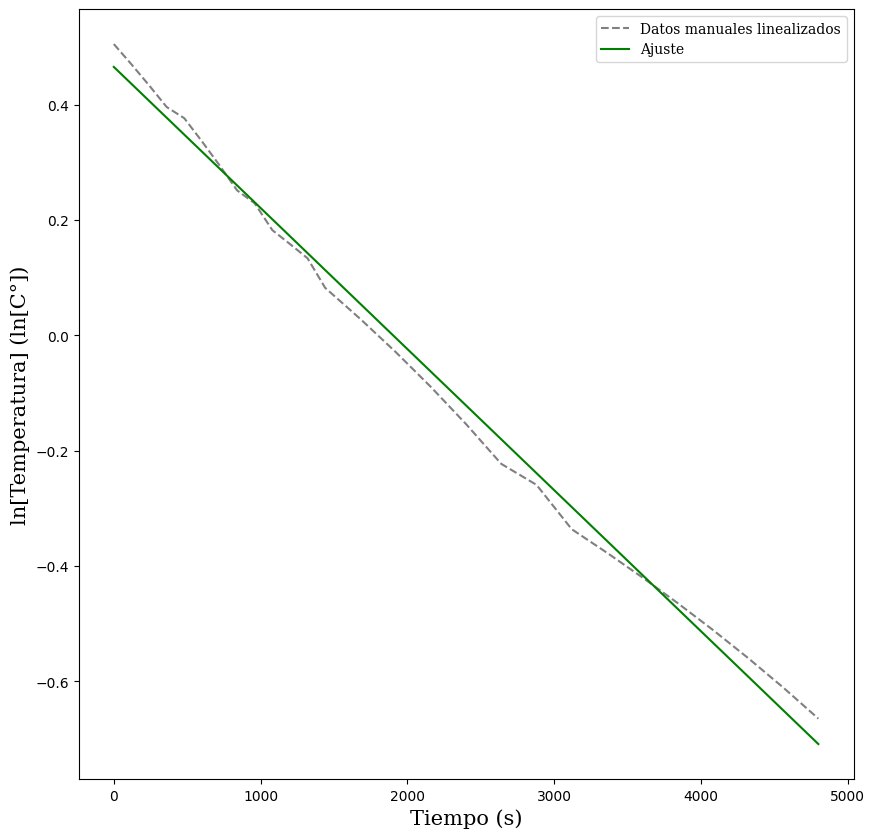

In [339]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(tiempo_manual, temp_manual_linealizada , '--', color = 'gray',  label='Datos manuales linealizados')
plt.plot(tiempo_manual, regress_manual.slope * tiempo_manual + regress_manual.intercept,  'g',  label='Ajuste')
plt.xlabel("Tiempo (s)", fontdict = font2)
plt.ylabel("ln[Temperatura] (ln[C°])", fontdict = font2)

legend = plt.legend(loc='upper right')
for text in legend.texts:
    text.set_fontsize(font3['size'])
    text.set_family(font3['family'])


In [340]:
#INCERTIDUMBRES

def_manual = 1
temp_manual_mas = temperatura_manual + def_manual
temp_manual_menos = temperatura_manual - def_manual

def_sa = 0.1
temp_sa_mas = temperatura_sa + def_sa
temp_sa_menos = temperatura_sa - def_sa


T0_manual_mas = np.max(temp_manual_mas)
T0_manual_menos = np.max(temp_manual_menos)
temp_manual_mas_linealizada = np.log( temp_manual_mas / (T0_manual_mas - Ta_manual) )
temp_manual_menos_linealizada = np.log( temp_manual_menos / (T0_manual_menos - Ta_manual) )

temp_manual_mas_regrees = stats.linregress(tiempo_manual, temp_manual_mas_linealizada)
temp_manual_menos_regrees = stats.linregress(tiempo_manual, temp_manual_menos_linealizada)

dtk_manual = (temp_manual_mas_regrees.slope - temp_manual_menos_regrees.slope) / 2
dt0_manual = (T0_manual_mas - T0_manual_menos) / 2


#--------------------------------------------------------------


T0_sa_mas = np.max(temp_sa_mas)
T0_sa_menos = np.max(temp_sa_menos)
temp_sa_mas_linealizada = np.log( temp_sa_mas / (T0_sa_mas - Ta_sa) )
temp_sa_menos_linealizada = np.log( temp_sa_menos / (T0_sa_menos - Ta_sa) )

temp_sa_mas_regrees = stats.linregress(tiempo_sa, temp_sa_mas_linealizada)
temp_sa_menos_regrees = stats.linregress(tiempo_sa, temp_sa_menos_linealizada)

dtk_sa = (temp_sa_mas_regrees.slope - temp_sa_menos_regrees.slope) / 2
dt0_sa = (T0_sa_mas - T0_sa_menos) / 2

In [345]:
#VALORES DE LA ECUACION TEORICA SA

To_Ta_sa = np.exp(regress.intercept)
K_sa = regress.slope

#VALORES DE LA ECUACION TEORICA MANUAL

To_Ta_manual = np.exp(regress_manual.intercept)
K_manual = regress_manual.slope

#ERROR DE TO-TA

errT = np.abs(To_Ta_sa - To_Ta_manual) / To_Ta_sa
errT_por = errT * 100

#ERROR DE K
errK = np.abs(K_sa - K_manual) / np.abs(K_sa)
errk_por = errK * 100

print(dt0_sa, dtk_sa)
print(dt0_manual, dtk_manual)

print(To_Ta_sa, K_sa)
print(To_Ta_manual, K_manual)


print("El error de To-Ta es de: ", errT_por, "%", "y el error de K es de: ", errk_por, "%")


0.10000000000000142 8.03232408256823e-07
1.0 7.861028069190105e-06
1.6031442318301332 -0.00023769811123729731
1.5927260614871936 -0.000244694933339156
El error de To-Ta es de:  0.6498585801632017 % y el error de K es de:  2.943574968028954 %


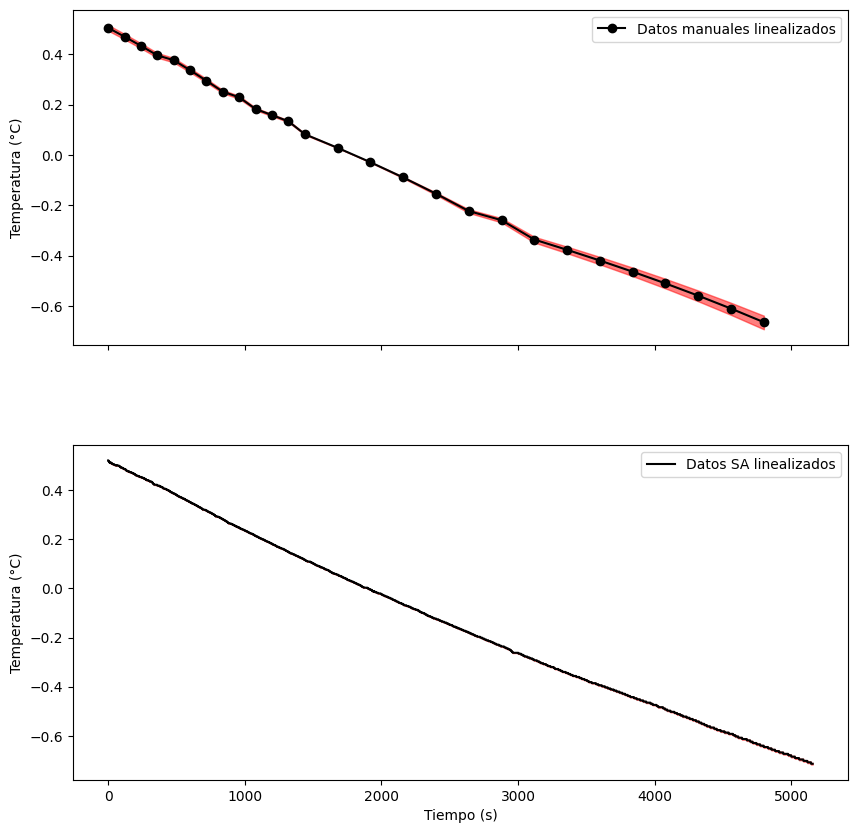

In [342]:
# Crear una figura con dos ejes verticales
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(10)

# Graficar los datos en el primer eje
ax1.plot(tiempo_manual, temp_manual_linealizada, '-o', color='black', label='Datos manuales linealizados')
ax1.fill_between(tiempo_manual, temp_manual_mas_linealizada, temp_manual_menos_linealizada, color='red', alpha=0.5)
ax1.set_ylabel('Temperatura (°C)')
ax2.set_xlabel('Tiempo (s)')
ax1.legend()

# Graficar los datos en el segundo eje
ax2.plot(tiempo_sa, temp_sa_linealizada, '-', color='black', label='Datos SA linealizados')
ax2.fill_between(tiempo_sa, temp_sa_mas_linealizada, temp_sa_menos_linealizada, color='red', alpha=0.5)
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Temperatura (°C)')
ax2.legend()

# Ajustar el espacio entre los ejes
fig.subplots_adjust(hspace=0.3)

# Mostrar la gráfica
plt.show()

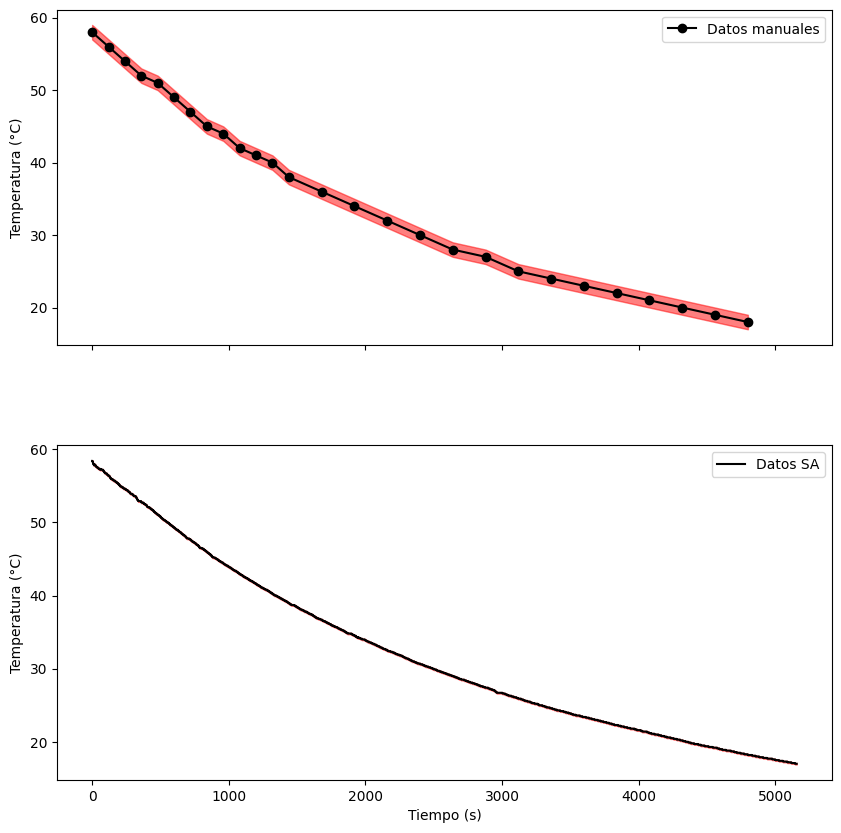

In [343]:
# Crear una figura con dos ejes verticales
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(10)

# Graficar los datos en el primer eje
ax1.plot(tiempo_manual, temperatura_manual, '-o', color='black', label='Datos manuales')
ax1.fill_between(tiempo_manual, temp_manual_mas, temp_manual_menos, color='red', alpha=0.5)
ax1.set_ylabel('Temperatura (°C)')
ax2.set_xlabel('Tiempo (s)')
ax1.legend()

# Graficar los datos en el segundo eje
ax2.plot(tiempo_sa, temperatura_sa, '-', color='black', label='Datos SA')
ax2.fill_between(tiempo_sa, temp_sa_mas, temp_sa_menos, color='red', alpha=0.5)
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Temperatura (°C)')
ax2.legend()

# Ajustar el espacio entre los ejes
fig.subplots_adjust(hspace=0.3)

# Mostrar la gráfica
plt.show()

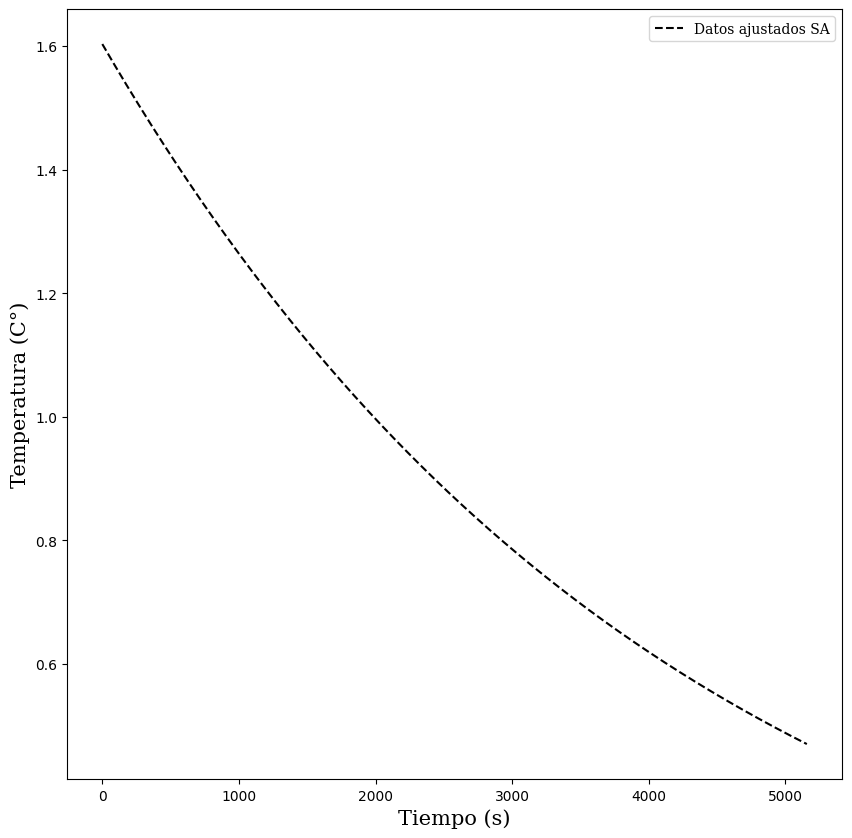

In [360]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}
font3 = {'family':'serif','color':'black','size':10}

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)


plt.plot(tiempo_sa, To_Ta_sa*np.exp(K_sa*tiempo_sa) , '--', color = 'black', label='Datos ajustados SA')
plt.xlabel("Tiempo (s)", fontdict = font2)
plt.ylabel("Temperatura (C°)", fontdict = font2)

legend = plt.legend(loc='upper right')
for text in legend.texts:
    text.set_fontsize(font3['size'])
    text.set_family(font3['family'])

plt.show()